<a href="https://colab.research.google.com/github/MahdiZakipour/from-Colaboratory/blob/main/C_1_MOOC_Image_Processing_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#@title Default title text
### Data Augmentation: Apply some changes to image, before training(e.g. ratate, flip, crop/scale, color jitter, ...)

### Wheight initialization, (e.g. Random initialization, HE init, Xavier init, ...)

### Regularization, 
# 1-Batch Normalization, 
# 2-Dropout(randomly trun off some -like 20% each layer- Neurons, then Get answer, then repeat the cycle),

### Data Augmentation: Apply some changes to image, before training(e.g. ratate, flip, crop/scale, color jitter, ...)

### Wheight initialization, (e.g. Random initialization, HE init, Xavier init, ...)

### Regularization, 
# 1-Batch Normalization, 
# 2-Dropout(randomly trun off some -like 20% each layer- Neurons, then Get answer, then repeat the cycle),


In [3]:
## Image Processing - MNist dataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


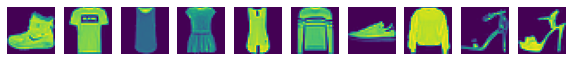

label for each of the image above is : [9 0 0 3 0 2 7 2 5 5]


In [5]:
# visualization some of the data
%matplotlib inline
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()
print('label for each of the image above is :', y_train[0:10])

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
## Data Preprocessing : (n, 28, 28) --> (n, 784)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# one_hot_encoding on Y:         (a simple function for this purpose: to_categorical)
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [18]:
## CNN creating: 
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras import optimizers

# a 5-layer model
model = Sequential()

model.add(Dense(50, input_shape = (784, ))) # input layer
model.add(Activation('sigmoid'))
model.add(Dense(50)) # Activation layer , "the wheight is Randomized [it's the best]"
model.add(Activation('sigmoid'))
model.add(Dense(50)) # Activation layer
model.add(Activation('sigmoid'))
model.add(Dense(50)) # Activation layer
model.add(Activation('sigmoid'))
model.add(Dense(10)) # Output layer
model.add(Activation('softmax'))

# compile the model
sgd = optimizers.SGD(lr = 0.01)
#sgd = optimizers.SGD(lr = 0.01) # "lr is the Learning Rate", slower learning: lr = 0.001

model.compile(optimizer = sgd,
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [19]:
# fit the model
history = model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
1200/1200 [==============================] - 3s 2ms/step - loss: 2.3057 - accuracy: 0.1264
Epoch 2/100
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2823 - accuracy: 0.1977
Epoch 3/100
1200/1200 [==============================] - 3s 2ms/step - loss: 2.2432 - accuracy: 0.2394
Epoch 4/100
1200/1200 [==============================] - 3s 2ms/step - loss: 2.0817 - accuracy: 0.2187
Epoch 5/100
1200/1200 [==============================] - 3s 2ms/step - loss: 1.8076 - accuracy: 0.2241
Epoch 6/100
1200/1200 [==============================] - 3s 2ms/step - loss: 1.6956 - accuracy: 0.2862
Epoch 7/100
1200/1200 [==============================] - 3s 2ms/step - loss: 1.6203 - accuracy: 0.3662
Epoch 8/100
1200/1200 [==============================] - 3s 2ms/step - loss: 1.5238 - accuracy: 0.3908
Epoch 9/100
1200/1200 [==============================] - 3s 3ms/step - loss: 1.4399 - accuracy: 0.3979
Epoch 10/100
1200/1200 [==============================] - 3s 2ms/step - l

In [20]:
# evaluate the model
results = model.evaluate(x_test, y_test)
print('\n Test Accuracy is:', results[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.8315 - accuracy: 0.6591

 Test Accuracy is: 0.6590999960899353


In [ ]:
### Improving the model
## solution 1 : Wheight Initialization => NOT IMPROVING results in our CASE
def slt1_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ))) # input layer
    model.add(Activation('sigmoid'))
    model.add(Dense(50)) # Activation layer , "the wheight is Randomized [it's the best]"
    model.add(Activation('sigmoid'))
    model.add(Dense(50)) # Activation layer
    model.add(Activation('sigmoid'))
    model.add(Dense(50)) # Activation layer
    model.add(Activation('sigmoid'))
    model.add(Dense(10)) # Output layer
    model.add(Activation('softmax'))

    # compile the model
    sgd = optimizers.SGD(lr = 0.01) # "lr is the Learning Rate", slower learning: lr = 0.001

    model.compile(optimizer = sgd,
                 loss = "categorical_crossentropy",
                 metrics = ['accuracy'])
    return model

In [ ]:
wheighted_model = slt1_model()
history = wheighted_model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.3121 - accuracy: 0.1129
Epoch 2/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.2925 - accuracy: 0.1635
Epoch 3/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.2828 - accuracy: 0.2162
Epoch 4/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.2647 - accuracy: 0.2990
Epoch 5/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.2164 - accuracy: 0.3429
Epoch 6/100
1200/1200 [==============================] - 1s 1ms/step - loss: 2.0466 - accuracy: 0.3319
Epoch 7/100
1200/1200 [==============================] - 1s 1ms/step - loss: 1.7778 - accuracy: 0.3745
Epoch 8/100
1200/1200 [==============================] - 2s 1ms/step - loss: 1.6399 - accuracy: 0.4575
Epoch 9/100
1200/1200 [==============================] - 2s 1ms/step - loss: 1.5519 - accuracy: 0.4814
Epoch 10/100
1200/1200 [==============================] - 2s 1ms/step - l

In [ ]:
### Improving the model
## solution 2 : Non-Linearity / activation -> 'relu'
def slt2_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ))) # input layer
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer , "the wheight is Randomized [it's the best]"
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    model.add(Activation('relu'))
    model.add(Dense(10)) # Output layer
    model.add(Activation('softmax'))

    # compile the model
    sgd = optimizers.SGD(lr = 0.01) # "lr is the Learning Rate", slower learning: lr = 0.001

    model.compile(optimizer = sgd,
                 loss = "categorical_crossentropy",
                 metrics = ['accuracy'])
    return model

In [ ]:
non_linear_model = slt2_model()
history = non_linear_model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1001
Epoch 2/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 3/100
1200/1200 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 4/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 5/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 6/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 7/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 8/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 9/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000
Epoch 10/100
1200/1200 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.1000

KeyboardInterrupt: 

In [ ]:
### Improving the model
## solution 3 : Batch Normaliztion (our old nrmalization !) --> Perfect
#(especially if you have 'relu', use 'Batch_Normalization')
from keras.layers import BatchNormalization, Dropout

def slt3_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ))) # input layer
    model.add(BatchNormalization()) # Normalization added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer , "the wheight is Randomized [it's the best]"
    model.add(BatchNormalization()) # Normalization added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    model.add(BatchNormalization()) # Normalization added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    #model.add(BatchNormalization()) # Normalization Not added, its arbterary / Hyper Parameter
    model.add(Activation('relu'))
    model.add(Dense(10)) # Output layer
    model.add(Activation('softmax'))

    # compile the model
    sgd = optimizers.SGD(lr = 0.01) # "lr is the Learning Rate", slower learning: lr = 0.001

    model.compile(optimizer = sgd,
                 loss = "categorical_crossentropy",
                 metrics = ['accuracy'])
    return model

In [ ]:
normalized_model = slt3_model()
history = normalized_model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.8091 - accuracy: 0.7410
Epoch 2/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4779 - accuracy: 0.8316
Epoch 3/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4258 - accuracy: 0.8482
Epoch 4/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3954 - accuracy: 0.8589
Epoch 5/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3737 - accuracy: 0.8654
Epoch 6/100
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3584 - accuracy: 0.8703
Epoch 7/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3423 - accuracy: 0.8755
Epoch 8/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3329 - accuracy: 0.8784
Epoch 9/100
1200/1200 [==============================] - 2s 2ms/step - loss: 0.3219 - accuracy: 0.8828
Epoch 10/100
1200/1200 [==============================] - 2s 2ms/step - l

In [ ]:
# evaluate the model
results3 = normalized_model.evaluate(x_test, y_test)
print('\n Test Accuracy is:', results3[1])

313/313 [==============================] - 0s 991us/step - loss: 0.4633 - accuracy: 0.8699

 Test Accuracy is: 0.8698999881744385


In [ ]:
### Improving the model
## solution 4 : Dropout -> Randomly neglect some neurons (e.g. 20%) in each layer
from keras.layers import BatchNormalization, Dropout

def slt4_model():
    model = Sequential()

    model.add(Dense(50, input_shape = (784, ))) # input layer
    model.add(Dropout(0.2)) # Dropout(0.2 = 20% of nerons in this layer) added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer , "the wheight is Randomized [it's the best]"
    model.add(Dropout(0.2)) # Dropout(0.2) added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    model.add(Dropout(0.2)) # Dropout(0.2) added
    model.add(Activation('relu'))
    model.add(Dense(50)) # Activation layer
    #model.add(Dropout(0.2)) # Dropout(0.2) Not added, its arbterary / Hyper Parameter
    model.add(Activation('relu'))
    model.add(Dense(10)) # Output layer
    model.add(Activation('softmax'))

    # compile the model
    sgd = optimizers.SGD(lr = 0.01) # "lr is the Learning Rate", slower learning: lr = 0.001

    model.compile(optimizer = sgd,
                 loss = "categorical_crossentropy",
                 metrics = ['accuracy'])
    return model


In [ ]:
dropeed_model = slt4_model()
history = dropeed_model.fit(x = x_train, y = y_train, batch_size = 50, epochs = 100, verbose = 1)

Epoch 1/100
1200/1200 [==============================] - 2s 1ms/step - loss: 19.7961 - accuracy: 0.0975
Epoch 2/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.1001
Epoch 3/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0982
Epoch 4/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 5/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0943
Epoch 6/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3026 - accuracy: 0.0984
Epoch 7/100
1200/1200 [==============================] - 2s 1ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 8/100
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3027 - accuracy: 0.0995
Epoch 9/100
1200/1200 [==============================] - 2s 2ms/step - loss: 2.3027 - accuracy: 0.0958
Epoch 10/100
1200/1200 [==============================] - 2s 2ms/step - 